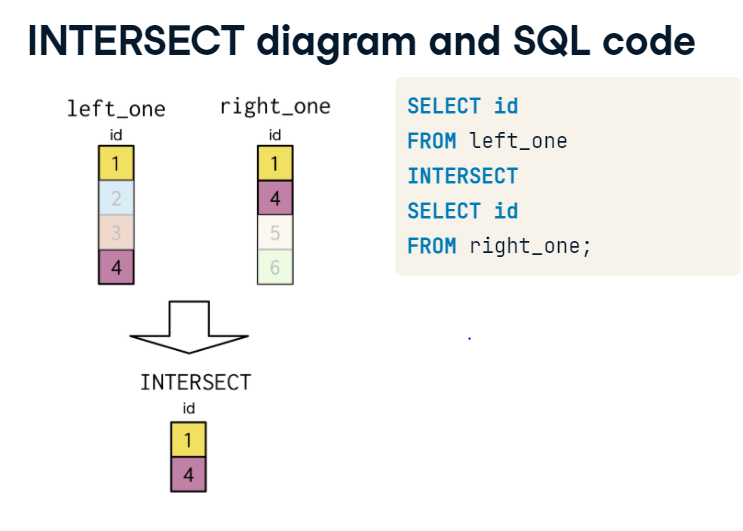
- Determine all common combinations of country code and year that exist in either the economies or the populations tables. Order by code then year.

```
SELECT code, year
FROM economies
  INTERSECT
SELECT country_code, year
FROM populations
ORDER BY code, year;
```

- As you think about major world cities and their corresponding country, you may ask which countries also have a city with the same name as their country name?

```
SELECT name
  FROM countries
	INTERSECT
SELECT name
  FROM cities;
```
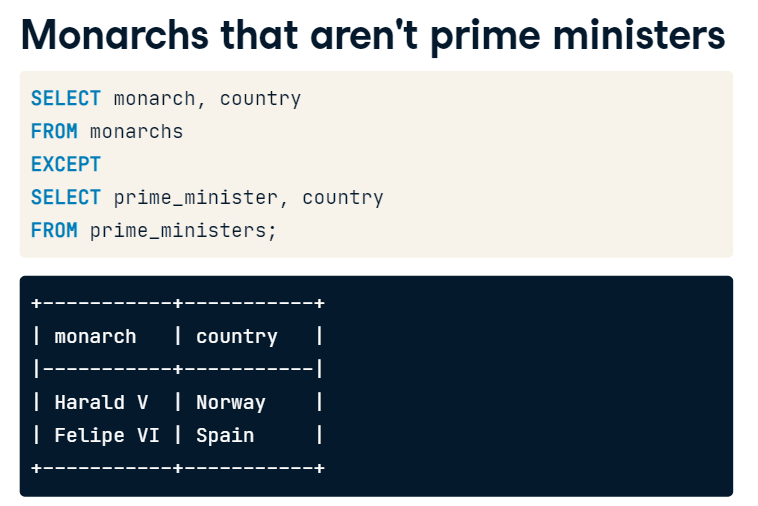

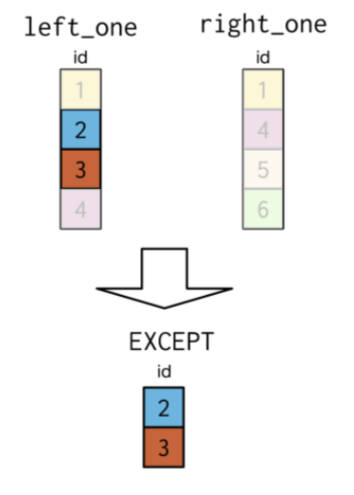

Get the names of cities in cities which are not noted as capital cities in countries as a single field result.


Note that there are some countries in the world that are not included in the countries table, which will result in some cities not being labeled as capital cities when in fact they are.

- Order the resulting field in ascending order.
- Can you spot the city/cities that are actually capital cities which this query misses?
```
SELECT name
  FROM cities
	EXCEPT
SELECT capital
  FROM countries
ORDER BY name;
```
- Determine the names of capital cities that are not listed in the cities table.
- Order by capital in ascending order.
- The cities table contains information about 236 of the world's most populous cities. The result of your query may surprise you in terms of the number of capital cities that DO NOT appear in this list!

```
SELECT capital
  FROM countries
	EXCEPT
SELECT name
  FROM cities
ORDER BY capital;
```
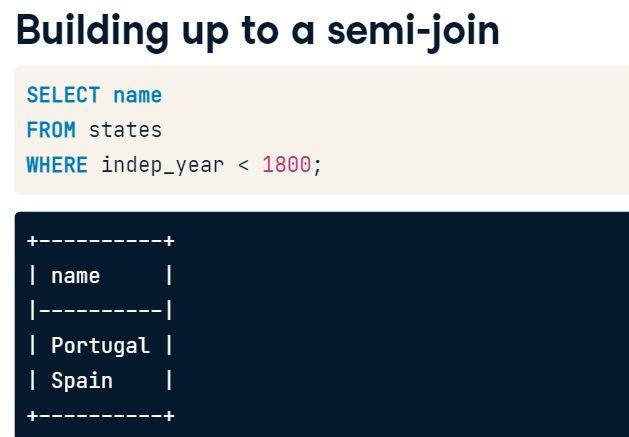
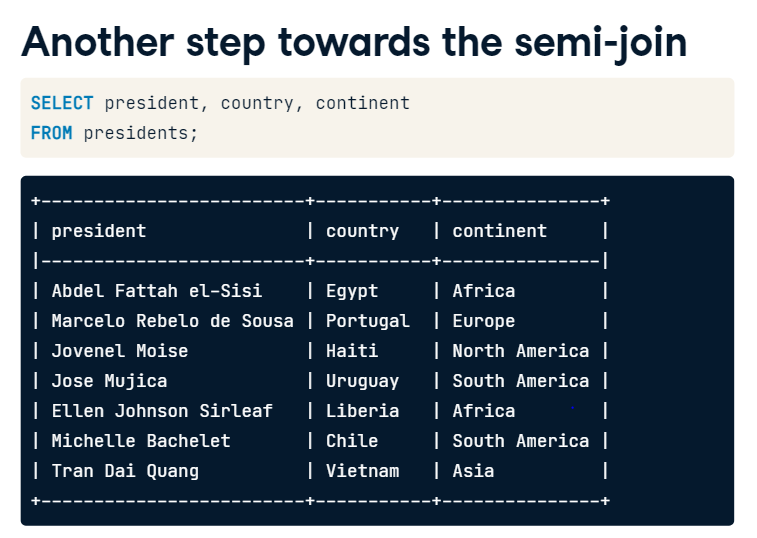
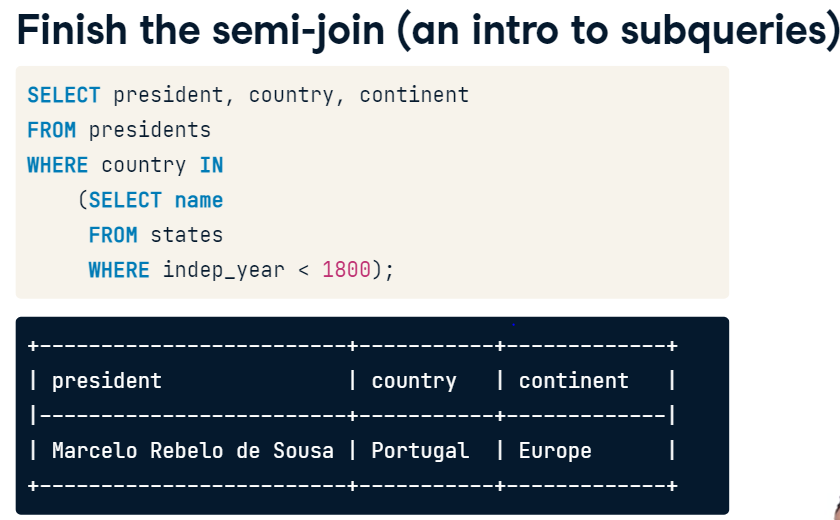
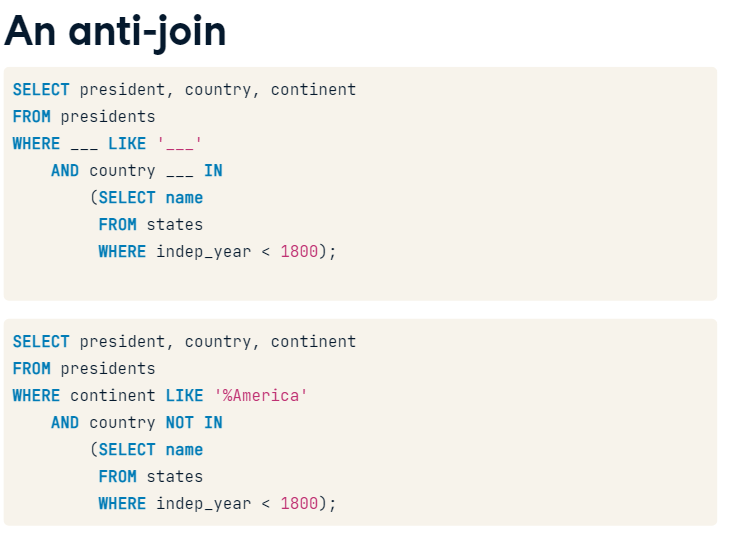
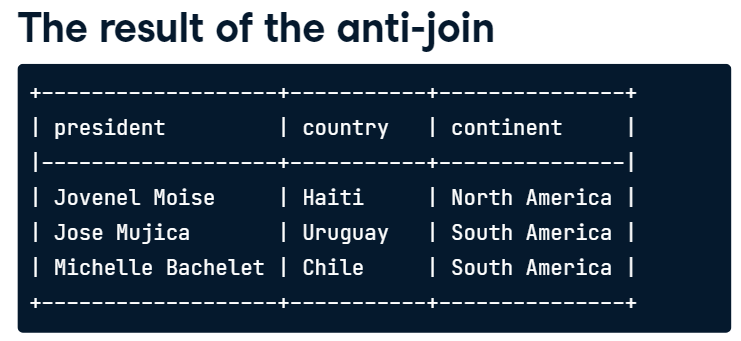
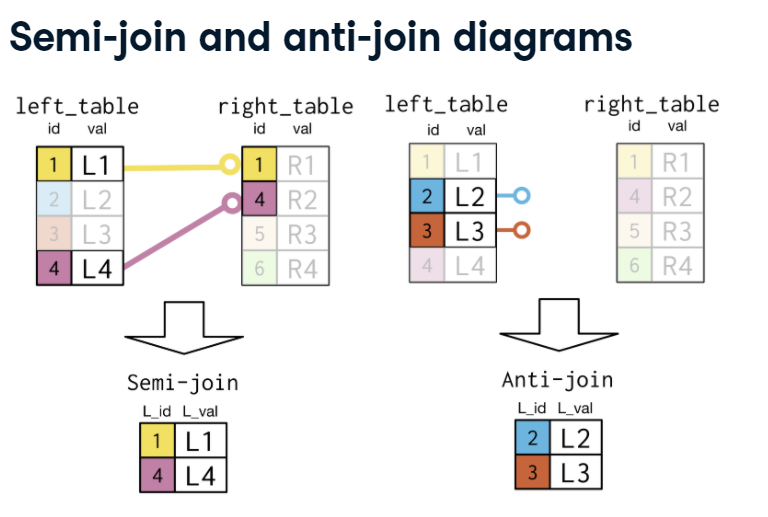
 - selecting all country codes in the Middle East as a single field result using SELECT, FROM, and WHERE
 ```
SELECT code
  -- From countries
  FROM countries
-- Where region is Middle East
WHERE region LIKE 'M% E%';
```
- Below the commented code, select only unique languages by name appearing in the languages table.
- Order the resulting single field table by name in ascending order.
```
SELECT DISTINCT name
  FROM languages
ORDER BY name;
```

**Now combine the previous two queries into one query:**

- Add a WHERE IN statement to the SELECT DISTINCT query, and use the commented out query from the first instruction in there. That way, you can determine the unique languages spoken in the Middle East.
```
SELECT DISTINCT name
  FROM languages
WHERE code IN
  (SELECT code
   FROM countries
   WHERE region = 'Middle East')
ORDER BY name;
```
Sometimes problems solved with semi-joins can also be solved using an inner join.
```
SELECT languages.name AS language
FROM languages
INNER JOIN countries
ON languages.code = countries.code
WHERE region = 'Middle East'
ORDER BY language;
```
This inner join isn't quite right. What is missing from this second code block to get it to match with the correct answer produced by the first block?

There's no use on retrieving 'Arabic' multiple times; you only care about DISTINCT languages here.


- Begin by determining the number of countries in countries that are listed in Oceania using SELECT, FROM, and WHERE.
```
SELECT COUNT(name)
  FROM countries
WHERE continent  LIKE 'O%';
```
- Complete an inner join with countries AS c1 on the left and currencies AS c2 on the right to get the different currencies used in the countries of Oceania.
- Match ON the code field in the two tables.
- Include the country code, country name, and basic_unit AS currency.


Observe query result and make note of how many different countries are listed here.
```
SELECT c1.code,name, c2.basic_unit AS currency
  FROM countries AS c1

INNER JOIN currencies AS c2
    ON c1.code = c2.code
WHERE c1.continent LIKE 'O%';
```

Note that not all countries in Oceania were listed in the resulting inner join with currencies. Use an anti-join to determine which countries were not included!


Use NOT IN and (SELECT code FROM currencies) as a subquery to get the country code and country name for the Oceanian countries that are not included in the currencies table.
```
SELECT code, name
  FROM countries
  WHERE continent = 'Oceania'
  	AND code NOT IN
  	(SELECT code
  	 FROM currencies);
```
- Identify the country codes that are included in either economies or currencies but not in populations.
- Use that result to determine the names of cities in the countries that match the specification in the previous instruction.

```
SELECT name
  FROM cities AS c1
  WHERE country_code IN
(
    SELECT e.CODE
    FROM economies AS e
    UNION
    SELECT c2.code
    FROM currencies AS c2
    EXCEPT
    SELECT p.country_code
    FROM populations AS p
);
```